# Lotería mexicana
<small>Alberto Benavides</small>


## Paquetes

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import animation
from matplotlib.animation import FuncAnimation

import matplotlib.patches as mpatches

## Baraja de cartas
La baraja de cartas de la Lotería mexicana cuenta con 54 figuras asociadas a un número. El gallo es el número 1, mientras que La rana es el número 54.

In [2]:
cartas = np.arange(1, 55)
cartas

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54])

Por darles un color a cada una:

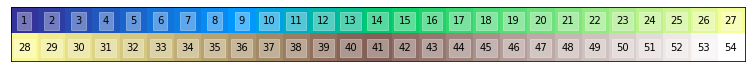

In [105]:
t = cartas.reshape(2, 27)
plt.figure(figsize=(14, 1))
plt.imshow(t, vmin = 1, vmax = 54, cmap = 'terrain')
# https://stackoverflow.com/a/63925180
for i in range(2): # rows
  for j in range(27): # columns
    text = plt.text(j, i, t[i, j], ha="center", va="center", color="black", backgroundcolor='#fff5')
plt.xticks([])
plt.yticks([])
plt.show()

## Tablas

Las tablas que se pueden formar en la Lotería mexicana constan de 16 figuras distribuidas en una matriz de cuatro filas y cuatro columnas. La mayoría de las tablas, como la $t_1$, tienen todas las figuras distintas.

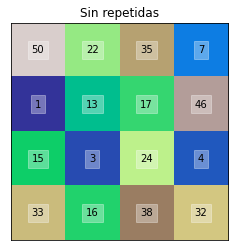

In [106]:
t1 = np.random.choice(cartas, 16, replace = False).reshape(4, 4)
plt.figure()
plt.title('Sin repetidas')
plt.imshow(t1, vmin = 1, vmax = 54, cmap = 'terrain')
for i in range(4): # rows
  for j in range(4): # columns
    text = plt.text(j, i, t1[i, j], ha="center", va="center", color="black", backgroundcolor='#fff5')
plt.xticks([])
plt.yticks([])
plt.show()

Sin embargo, existen tablas con doble figura. La doble figura puede estar en las esquinas, como en la tabla $t_2$.

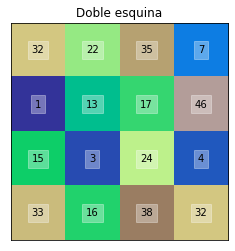

In [107]:
t2 = t1.copy()
t2[0, 0] = t2[3, 3]
plt.figure()
plt.title('Doble esquina')
plt.imshow(t2, vmin = 1, vmax = 54, cmap = 'terrain')
for i in range(4): # rows
  for j in range(4): # columns
    text = plt.text(j, i, t2[i, j], ha="center", va="center", color="black", backgroundcolor='#fff5')
plt.xticks([])
plt.yticks([])
plt.show()

O en en el centro, como en la tabla $t_3$ de abajo.

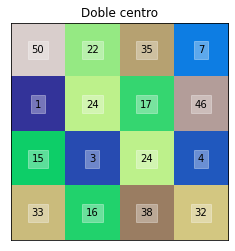

In [108]:
t3 = t1.copy()
t3[1, 1] = t3[2, 2]
plt.figure()
plt.title('Doble centro')
plt.imshow(t3, vmin = 1, vmax = 54, cmap = 'terrain')
for i in range(4): # rows
  for j in range(4): # columns
    text = plt.text(j, i, t3[i, j], ha="center", va="center", color="black", backgroundcolor='#fff5')
plt.xticks([])
plt.yticks([])
plt.show()

## Condiciones de victoria

In [79]:
jugadas = np.array([
  # horizontales
  [0, 1, 2, 3],
  [4, 5, 6, 7],
  [8, 9, 10, 11],
  [12, 13, 14, 15],
  
  # verticales
  [0, 4, 8, 12], 
  [1, 5, 9, 13],
  [2, 6, 10, 14],
  [3, 7, 11, 15],
  
  # diagonales
  [0, 5, 10, 15],
  [3, 6, 9, 12],
  
  # cuadro grande
  [0, 3, 12, 15],
  
  # cuadros chicos
  [0, 1, 4, 5],
  [1, 2, 5, 6],
  [2, 3, 6, 7],
  [4, 5, 8, 9],
  [5, 6, 9, 10],
  [6, 7, 10, 11],
  [8, 9, 12, 13],
  [9, 10, 13, 14],
  [10, 11, 14, 15]
])

## Prueba unitaria
Se genera una secuencia de cartas a partir de la baraja, como si se diera la lotería. Se comparte la secuencia completa, de izquierda a derecha y de arriba a abajo.

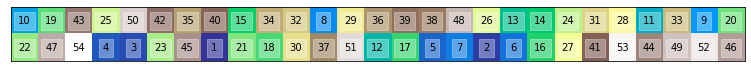

In [116]:
secuencia = np.random.choice(cartas, 54, replace = False)
t = secuencia.reshape(2, 27)
plt.figure(figsize=(14, 1))
plt.imshow(t, vmin = 1, vmax = 54, cmap = 'terrain')
for i in range(2): # rows
  for j in range(27): # columns
    text = plt.text(j, i, t[i, j], ha="center", va="center", color="black", backgroundcolor='#fff5')
plt.xticks([])
plt.yticks([])
plt.show()

Aquí viene la parte central de la prueba unitaria. Se trata de revisar cada carta que sale en la secuencia (línea 1 y 2), revisar si coinciden con las fichas de alguna de las tablas (líneas 5 a 7). Si alguna de las tablas tiene 4 o más coincidencias (línea 8) se revisa si alguna de ellas es un subconjunto de las condiciones de victoria. Si lo es, se incrementa en uno el número de victorias para cada tabla

In [117]:
victorias = [0, 0, 0]
for i in range(3, 55):
  s = secuencia[:i] # cartas sacadas
  # https://stackoverflow.com/a/11483958
  puestas1 = np.in1d(t1, s).nonzero()[0]
  puestas2 = np.in1d(t2, s).nonzero()[0]
  puestas3 = np.in1d(t3, s).nonzero()[0]
  if len(puestas1) >= 4 or len(puestas2) >= 4 or len(puestas3) >= 4:
    buenas1 = [set(row).issubset(puestas1) for row in jugadas.tolist()]
    buenas2 = [set(row).issubset(puestas2) for row in jugadas.tolist()]
    buenas3 = [set(row).issubset(puestas3) for row in jugadas.tolist()]    
    if sum(buenas1) >= 1 or sum(buenas2) >= 1 or sum(buenas3) >= 1:
      if np.any(buenas1):
        victorias[0] += 1
      if np.any(buenas2):
        victorias[1] += 1
      if np.any(buenas3):
        victorias[2] += 1
      break

Como las tablas tienen las figuras en las mismas posiciones, salvo por las figuras dobles, es muy probable que ganen las tres tablas a la vez. Abajo se muestran las victorias de la tabla 1, 2 y 3, en ese orden.

In [118]:
print(victorias)

[1, 1, 1]


Como puede apreciarse, la tabla con la que más victorias se logran es la de doble esquina, mientras que la del doble centro y la que tiene todas las figuras distintas conllevan casi el mismo resultado a lo largo de mil partidas.

## Experimento

Aunado a esta duda, también se analiza la estrategia de cambiar de tabla cada jugada, con las tres variantes anteriores: todas las figuras distintas ($t_4$), doble esquina ($t_5$) y doble centro ($t_6$).

In [119]:
victorias = []
repeticiones = range(100000)
for r in repeticiones:
  # Se cambian las tablas antes de hacer la jugada, jeje
  t4 = np.random.choice(cartas, 16, replace = False).reshape(4, 4)
  t5 = t4.copy()
  t5[0, 0] = t5[3, 3]
  t6 = t4.copy()
  t6[1, 1] = t6[2, 2]
  
  secuencia = np.random.choice(cartas, 54, replace = False)
  for i in range(3, 55):
    s = secuencia[:i] # cartas sacadas
    # https://stackoverflow.com/a/11483958
    puestas1 = np.in1d(t1, s).nonzero()[0]
    puestas2 = np.in1d(t2, s).nonzero()[0]
    puestas3 = np.in1d(t3, s).nonzero()[0]
    puestas4 = np.in1d(t4, s).nonzero()[0]
    puestas5 = np.in1d(t5, s).nonzero()[0]
    puestas6 = np.in1d(t6, s).nonzero()[0]
    if len(puestas1) >= 4 or len(puestas2) >= 4 or len(puestas3) >= 4:
      buenas1 = []
      buenas2 = []
      buenas3 = []
      buenas4 = []
      buenas5 = []
      buenas6 = []
      for j in jugadas.tolist():
        buenas1.append(set(j).issubset(puestas1))
        buenas2.append(set(j).issubset(puestas2))
        buenas3.append(set(j).issubset(puestas3))
        buenas4.append(set(j).issubset(puestas4))
        buenas5.append(set(j).issubset(puestas5))
        buenas6.append(set(j).issubset(puestas6))
      if sum(buenas1) >= 1 or sum(buenas2) >= 1 or sum(buenas3) >= 1 or sum(buenas4) >= 1 or sum(buenas5) >= 1 or sum(buenas6) >= 1:
        victorias.append([np.any(buenas1).astype(int), np.any(buenas2).astype(int), np.any(buenas3).astype(int), 
                          np.any(buenas4).astype(int), np.any(buenas5).astype(int), np.any(buenas6).astype(int)])
        break

Aquí está un vistazo de todas las jugadas por tabla. Aparece un `1` cuando la tabla gana y un `0` cuando pierde. Si hay empate, las cartas que empatan tienen `1`.

In [120]:
victorias = pd.DataFrame(victorias, columns = ['No rep.', 'Doble esquina', 'Doble centro', 'No rep., cambio', 'Doble esquina, cambio', 'Doble centro, cambio'])
victorias

,No rep.,Doble esquina,Doble centro,"No rep., cambio","Doble esquina, cambio","Doble centro, cambio"
0,0,0,0,1,1,0
1,1,1,1,0,0,0
2,1,1,1,0,0,0
3,0,0,0,1,1,1
4,0,0,0,1,1,0
...,...,...,...,...,...,...
99995,0,0,0,0,0,1
99996,0,0,0,0,0,1
99997,1,1,1,0,0,0
99998,0,0,0,0,1,0


Ya con esto, se puede ver que la mejor elección con base en esta simulación es cambiar de tabla cada jugada, eligiendo una con doble esquina. Esto no es tan eficiente, así que mantener una con doble esquina sería la segunda mejor opción, de modo que cambiar de tabla de vez en cuando sería lo ideal, para no levantar sospechas, jajaja.

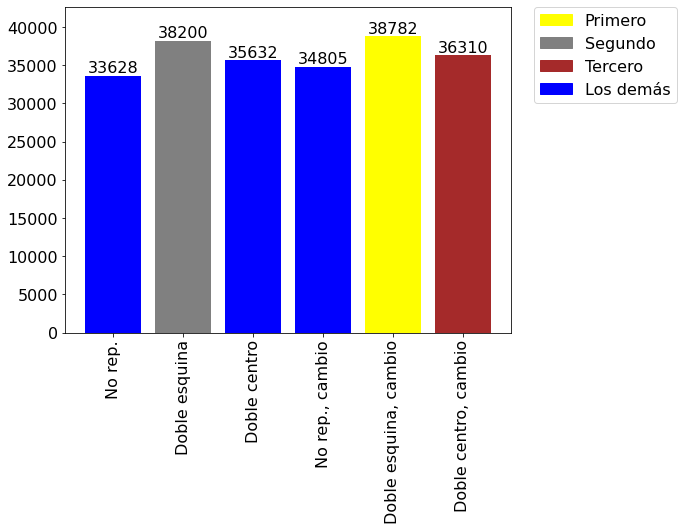

In [154]:
colors = ['yellow', 'gray', 'brown', 'blue', 'blue', 'blue']
p = mpatches.Patch(color='yellow', label='Primero')
s = mpatches.Patch(color='gray', label='Segundo')
t = mpatches.Patch(color='brown', label='Tercero')
d = mpatches.Patch(color='blue', label='Los demás')

v_rank = (6 - victorias.sum().rank(method='max')).values.astype('int')

plt.figure(figsize = (8, 6))
ax = plt.gca()
bar = plt.bar(victorias.columns, victorias.sum(),
             color = (colors[v_rank[0]], colors[v_rank[1]], colors[v_rank[2]], colors[v_rank[3]], colors[v_rank[4]], colors[v_rank[5]]))
plt.ylim(0, max(victorias.sum()) + int(max(victorias.sum()) / 10))
plt.xticks(rotation = 90, fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(handles=[p, s, t, d], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.0, fontsize = 16)

ax.bar_label(bar, fontsize = 16)
plt.show()

Por último, sólo se muestra una visualización de las jugadas y victorias.

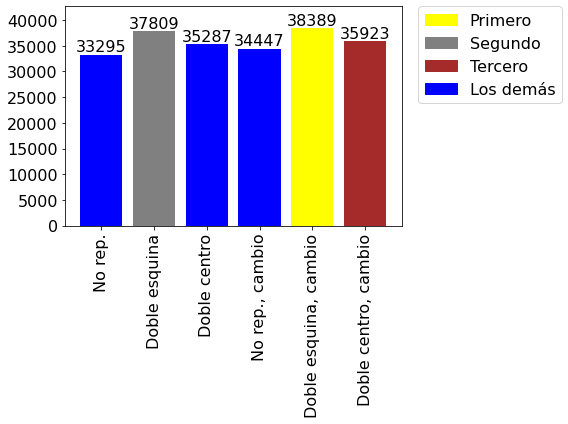

In [155]:
fig = plt.figure(figsize = (8, 6))
ax = plt.gca()
colors = ['yellow', 'gray', 'brown', 'blue', 'blue', 'blue']
p = mpatches.Patch(color='yellow', label='Primero')
s = mpatches.Patch(color='gray', label='Segundo')
t = mpatches.Patch(color='brown', label='Tercero')
d = mpatches.Patch(color='blue', label='Los demás')
# https://towardsdatascience.com/animations-with-matplotlib-d96375c5442c

def animate(i):
  fig.tight_layout()
  # https://stackoverflow.com/a/70031289
  ax.cla()
  v = victorias.iloc[:i]
  
  plt.ylim(0, max(victorias.sum()) + int(max(victorias.sum()) / 10))
  
  # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html
  v_rank = (6 - v.sum().rank(method='max')).values.astype('int')
  bar = plt.bar(victorias.columns, v.sum(), 
                color = (colors[v_rank[0]], colors[v_rank[1]], colors[v_rank[2]], colors[v_rank[3]], colors[v_rank[4]], colors[v_rank[5]]))
  
  # https://stackoverflow.com/a/68107816
  ax.bar_label(bar, fontsize = 16)
  
  ax.legend(handles=[p, s, t, d], bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad = 0.0, fontsize = 16)
  
  plt.xticks(rotation = 90, fontsize = 16)
  plt.yticks(fontsize = 16)
  
  return(v,)

# https://holypython.com/python-visualization-tutorial/creating-bar-chart-animations/
# https://holypython.com/how-to-save-matplotlib-animations-the-ultimate-guide/
anim = FuncAnimation(fig, animate, interval=1, frames = range(0, len(victorias), 1000), repeat_delay= 1000)
# http://louistiao.me/posts/notebooks/save-matplotlib-animations-as-gifs/
anim.save('victorias.gif', fps = 20)